<a href="https://colab.research.google.com/github/Medynal/Pollution/blob/main/pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Medynal/Pollution.git

Cloning into 'Pollution'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 76 (delta 20), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 1.90 MiB | 6.57 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
%cd

/root


In [ ]:
%ls

Pollution/


In [ ]:
# importing the necessary libraries for data analysis
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [ ]:
pollution_dataset= '/content/Pollution/data_folder'
dataframes = []
for filename in os.listdir(pollution_dataset):
    if filename.endswith('.csv'):  # Check if the file is a CSV file
        file_path = os.path.join(pollution_dataset, filename)
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        dataframes.append(df)  # Add the DataFrame to the list

In [ ]:
pollution_df = pd.concat(dataframes, ignore_index=True)
pollution_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01/01/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02/01/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03/01/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04/01/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05/01/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Ernakulam,27/06/2020,12.14,27.94,5.19,2.16,3.29,4.78,2.43,2.69,NaN,0.38,1.43,0.09,108.0,Moderate
29527,Ernakulam,28/06/2020,8.97,21.47,7.27,2.00,4.63,7.32,2.16,2.66,NaN,0.27,0.98,0.00,106.0,Moderate
29528,Ernakulam,29/06/2020,12.22,24.97,5.44,2.17,3.45,5.06,2.41,2.74,NaN,0.18,0.30,0.04,109.0,Moderate
29529,Ernakulam,30/06/2020,11.87,30.24,3.80,2.35,2.39,2.99,2.42,2.65,NaN,0.00,0.00,0.00,109.0,Moderate


In [ ]:
print ('shape', pollution_df.shape )

def unique_col(df):
  for column in df.columns:
    print (f'{column}: {df[column].nunique()}')

print(f'\nnumber of unigue value in each column')
unique_col(pollution_df)
print ('\n')
pollution_df.info()

shape (29531, 16)

number of unigue value in each column
City: 26
Date: 2009
PM2.5: 11716
PM10: 12571
NO: 5776
NO2: 7404
NOx: 8156
NH3: 5922
CO: 1779
SO2: 4761
O3: 7699
Benzene: 1873
Toluene: 3608
Xylene: 1561
AQI: 829
AQI_Bucket: 6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64


In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum() # Total missing values
    mis_val_percent = 100 * mis_val / len(df)  # Percentage of missing values
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)  # Sort the table by percentage of missing descending
    return mis_val_table

missing_values = missing_values_table(pollution_df)
display(missing_values.style.background_gradient(cmap='Blues'))

,Missing Values,% of Total Values
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


In [ ]:
pollution_df['Date']= pd.to_datetime(pollution_df['Date'], errors= 'raise',format= '%d/%m/%Y')
pollution_df['year']= pollution_df['Date'].dt.year
pollution_df['month']= pollution_df['Date'].dt.month
pollution_df['day']= pollution_df['Date'].dt.day
pollution_df['Month name']= pollution_df['Date'].dt.month_name()


In [ ]:
missing_values_per_city = pollution_df.groupby('City').apply(lambda x: x.isnull().sum())
missing_values_per_city

/tmp/ipython-input-287144263.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_per_city = pollution_df.groupby('City').apply(lambda x: x.isnull().sum())


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day,Month name
City,,,,,,,,,,,,,,,,,,,,
Ahmedabad,0,0,628,1602,609,608,594,2009,609,640,685,483,483,484,675,675,0,0,0,0
Aizawl,0,0,2,1,0,0,0,0,0,0,9,15,15,113,2,2,0,0,0,0
Amaravati,0,0,59,55,55,55,55,55,97,65,55,75,75,269,110,110,0,0,0,0
Amritsar,0,0,128,63,93,44,289,42,76,168,115,195,212,213,95,95,0,0,0,0
Bengaluru,0,0,146,360,6,6,4,203,11,6,144,266,93,2009,99,99,0,0,0,0
Bhopal,0,0,9,9,9,9,9,9,9,9,9,289,289,289,11,11,0,0,0,0
Brajrajnagar,0,0,185,173,243,234,175,226,150,193,203,173,938,938,225,225,0,0,0,0
Chandigarh,0,0,15,0,4,4,4,10,0,0,0,0,0,0,5,5,0,0,0,0
Chennai,0,0,117,1707,36,36,36,462,25,36,49,285,253,2009,125,125,0,0,0,0


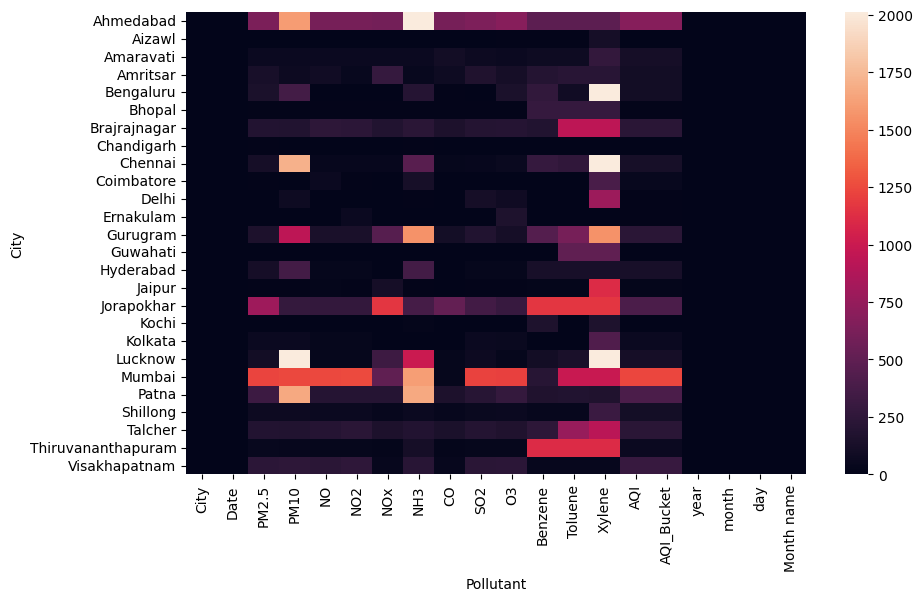

In [ ]:
plt.figure(figsize= (10,6))
sns.heatmap(missing_values_per_city)
plt.xlabel('Pollutant')
plt.show()

In [ ]:
pollution_df= pollution_df.sort_values(['City', 'Date'],ascending= [True, True])

In [ ]:
pollutants = ["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3",
              "Benzene","Toluene","Xylene", "AQI", "AQI_Bucket"]

pollution_df[pollutants] = pollution_df.groupby(['City', 'year'])[pollutants].ffill().bfill()
pollution_df.isna().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:

pollution_df.head(20)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day,Month name
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor,2015,1,1,January
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor,2015,1,2,January
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor,2015,1,3,January
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor,2015,1,4,January
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor,2015,1,5,January
5,Ahmedabad,2015-01-06,73.24,141.54,45.41,38.48,81.50,26.64,45.41,45.76,46.51,5.42,10.83,1.93,209.0,Poor,2015,1,6,January
6,Ahmedabad,2015-01-07,73.24,141.54,112.16,40.62,130.77,26.64,112.16,32.28,33.47,0.00,0.00,0.00,209.0,Poor,2015,1,7,January
7,Ahmedabad,2015-01-08,73.24,141.54,80.87,36.74,96.75,26.64,80.87,38.54,31.89,0.00,0.00,0.00,209.0,Poor,2015,1,8,January
8,Ahmedabad,2015-01-09,73.24,141.54,29.16,31.00,48.00,26.64,29.16,58.68,25.75,0.00,0.00,0.00,209.0,Poor,2015,1,9,January
9,Ahmedabad,2015-01-10,73.24,141.54,29.16,7.04,0.00,26.64,29.16,8.29,4.55,0.00,0.00,0.00,209.0,Poor,2015,1,10,January


In [ ]:
pollution_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,29531,2018-05-14 05:40:15.807118080,2015-01-01 00:00:00,2017-04-16 00:00:00,2018-08-05 00:00:00,2019-09-03 00:00:00,2020-07-01 00:00:00,NaN
PM2.5,29531.0,70.624591,0.04,27.03,47.42,83.4,949.99,75.464232
PM10,29531.0,118.058079,0.01,58.53,91.14,151.46,1000.0,92.590302
NO,29531.0,23.267042,0.02,5.92,10.53,23.0,390.68,34.27969
NO2,29531.0,26.828489,0.01,10.45,20.17,35.03,362.21,23.768038
NOx,29531.0,35.268039,0.0,13.74,24.37,44.54,467.63,33.887155
NH3,29531.0,24.986702,0.01,8.755,18.9,35.09,352.89,24.332619
CO,29531.0,4.018354,0.0,0.5,0.91,1.5,175.81,18.615699
SO2,29531.0,22.451476,0.01,5.71,9.59,17.81,193.86,39.103568
O3,29531.0,33.055154,0.01,17.24,28.84,43.73,257.73,21.991847


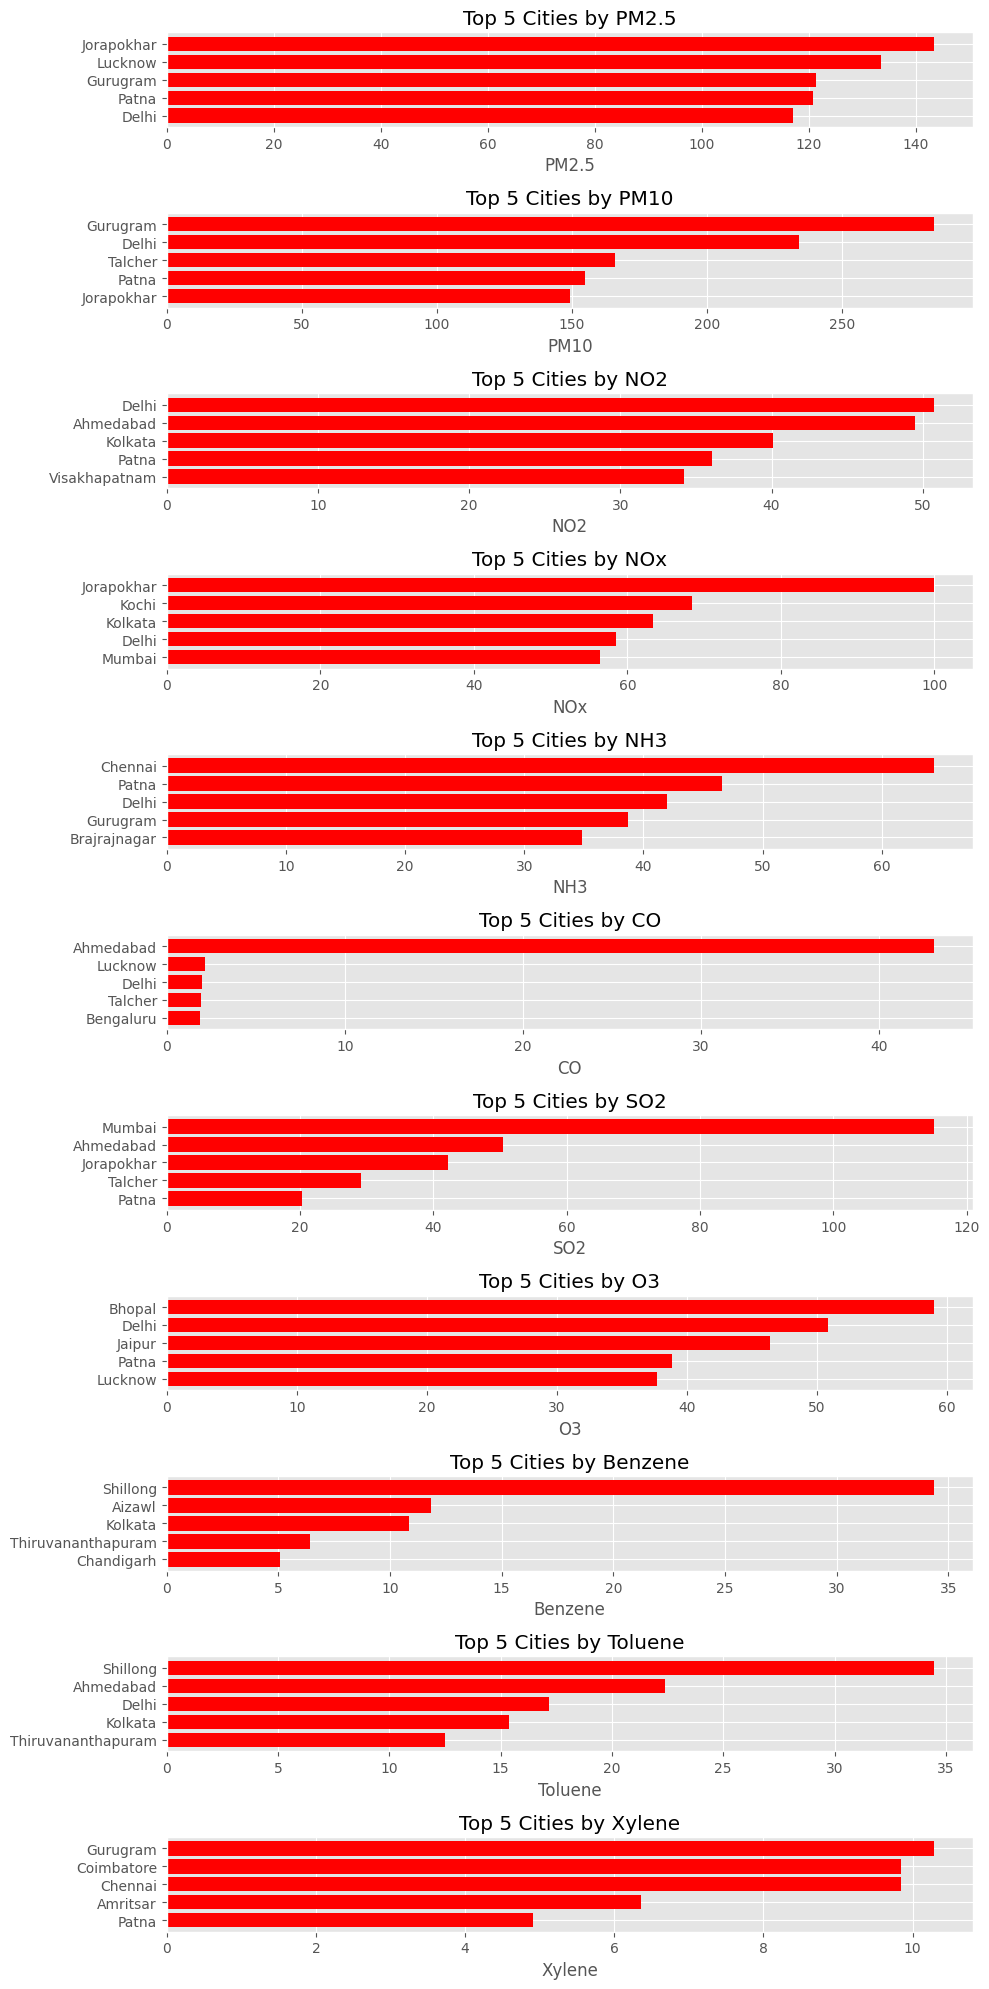

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

pollutant_columns = ['PM2.5','PM10','NO2','NOx','NH3','CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']

#Group by station and calculate mean pollutant concentrations
mean_pollutant_by_city =pollution_df.groupby('City')[pollutant_columns].mean()

#Find the top 5 stations for each pollutant
top_city = {}
for pollutant in pollutant_columns:
    top_city[pollutant] = mean_pollutant_by_city[pollutant].sort_values(ascending=False).head(5)

# Step 3: Plotting
fig, axes = plt.subplots(len(pollutant_columns), 1, figsize=(10, 20))

for i, pollutant in enumerate(pollutant_columns):
    axes[i].barh(top_city[pollutant].index, top_city[pollutant].values, color='red')
    axes[i].set_title(f'Top 5 Cities by {pollutant}')
    axes[i].set_xlabel(f'{pollutant}')
    axes[i].invert_yaxis()  # Highest values on top

plt.tight_layout()
plt.show()


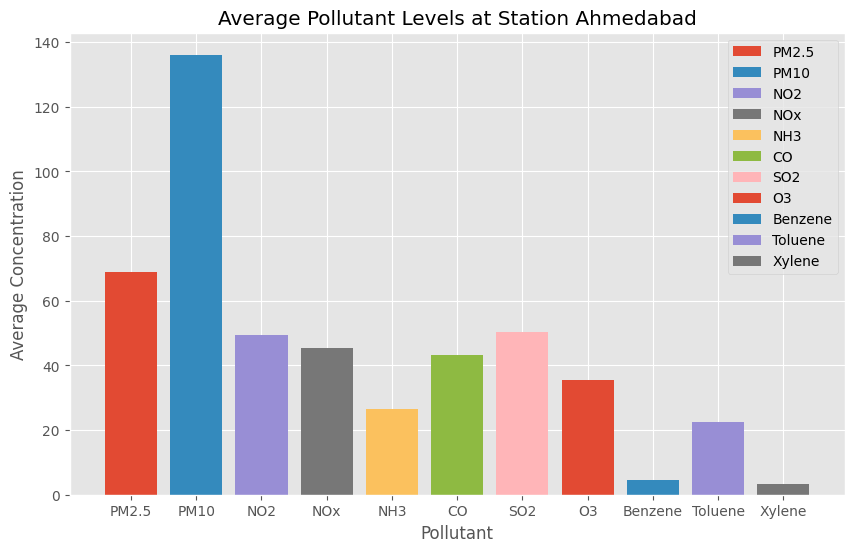

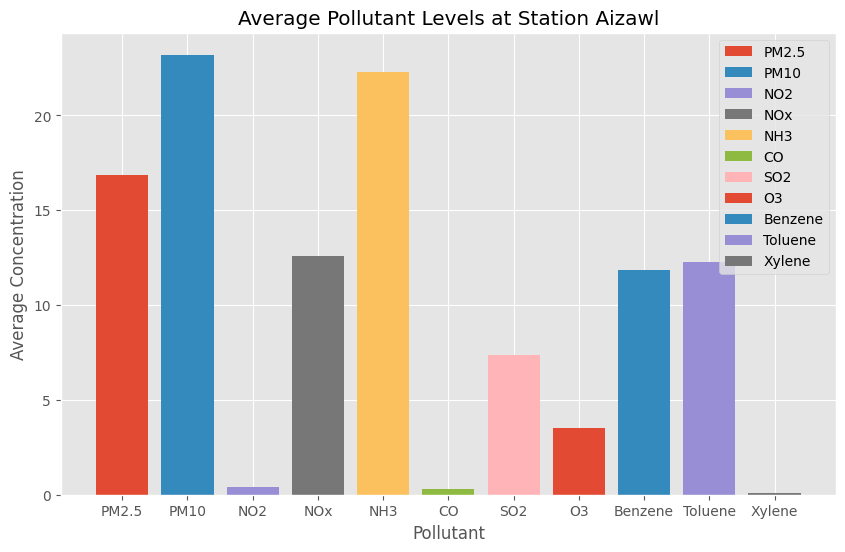

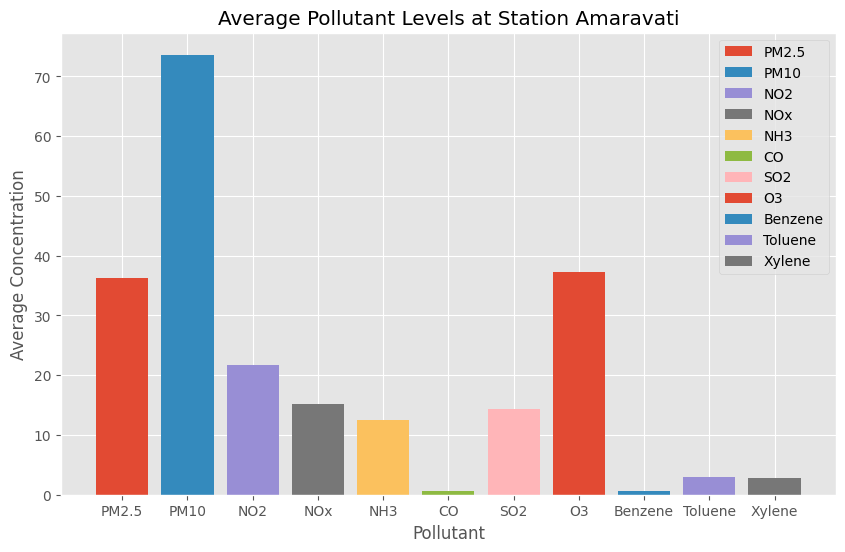

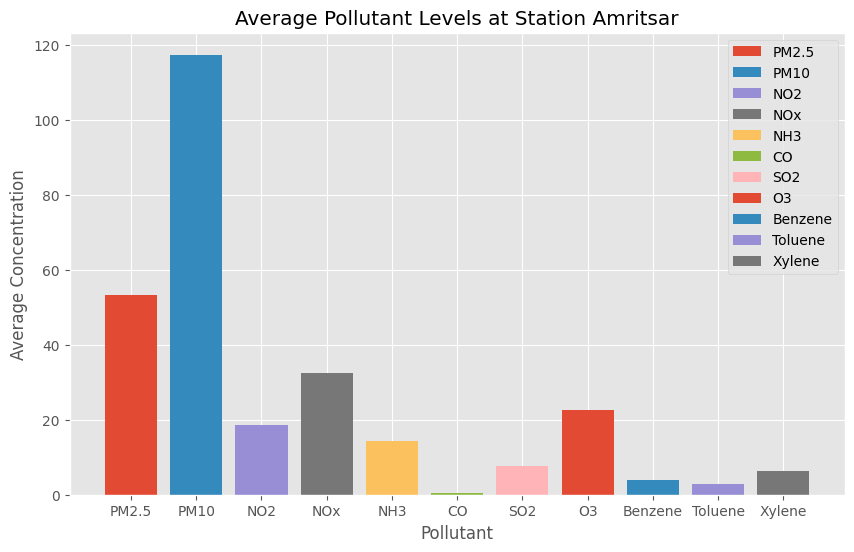

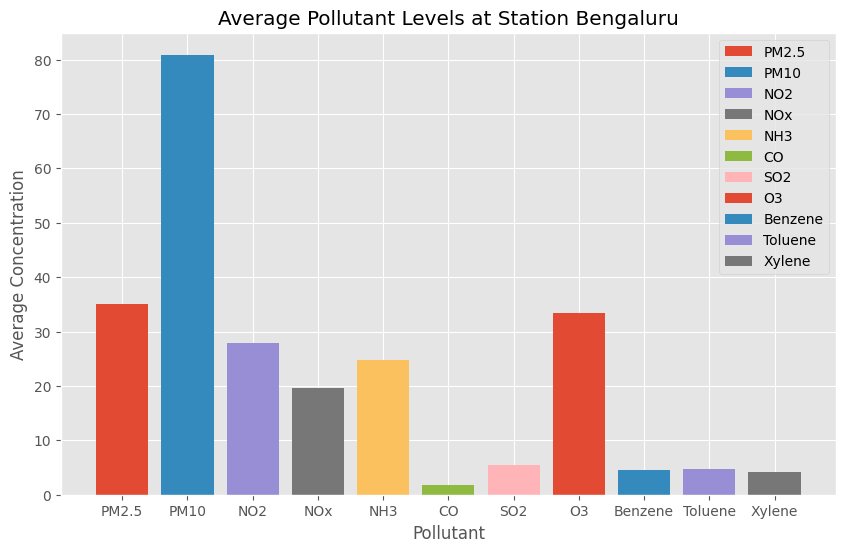

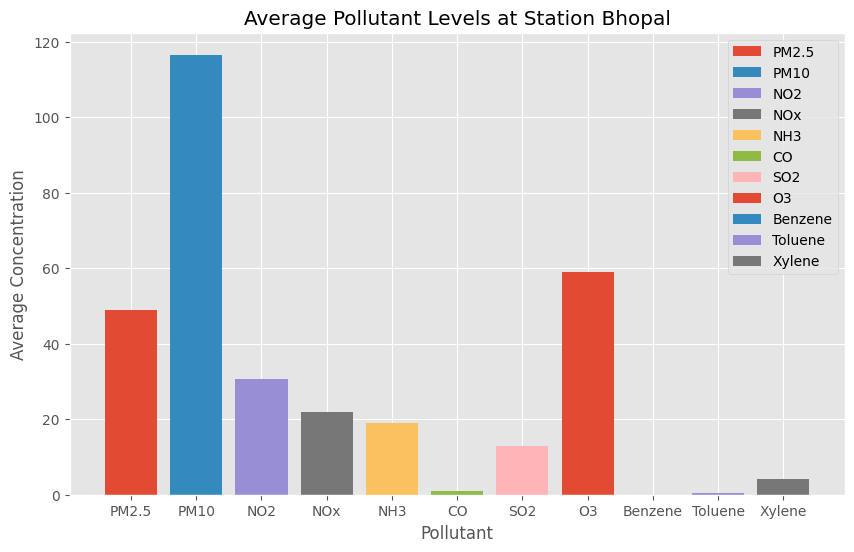

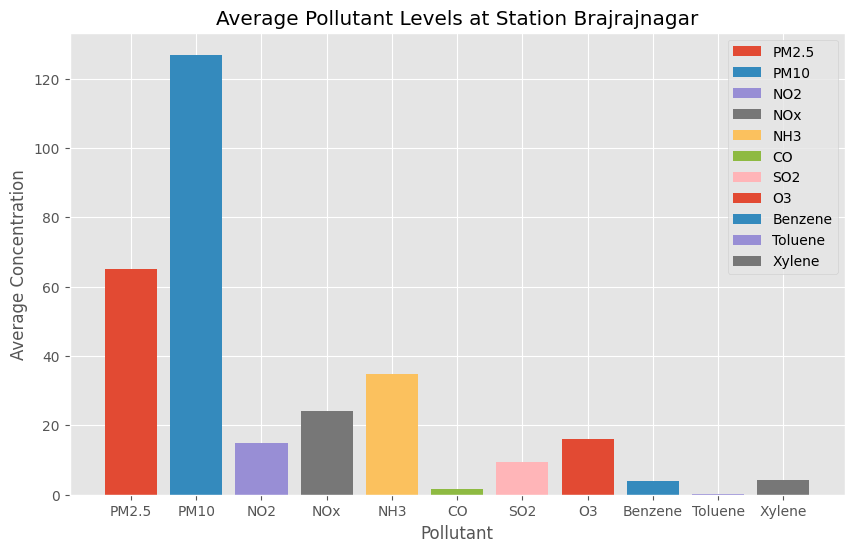

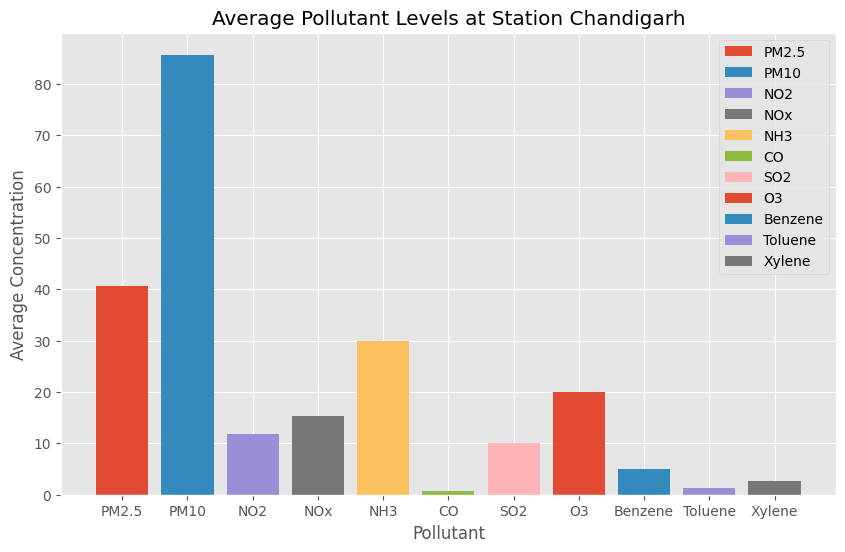

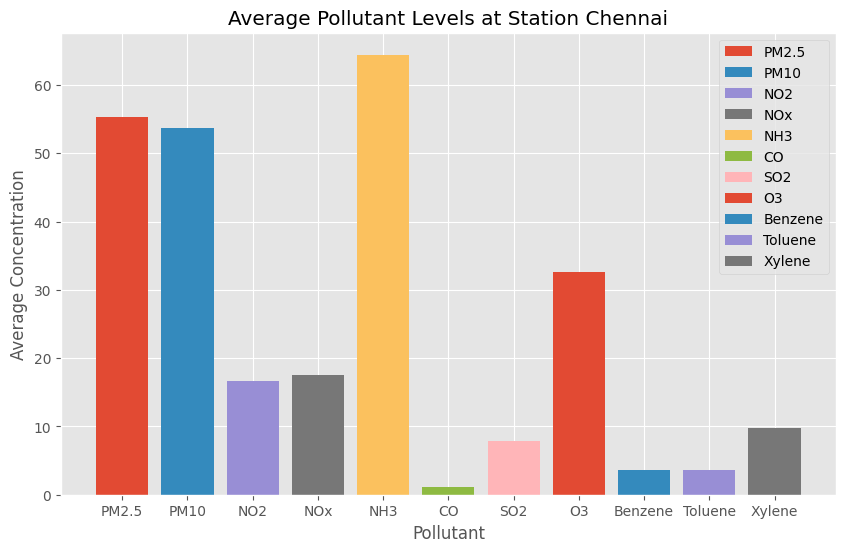

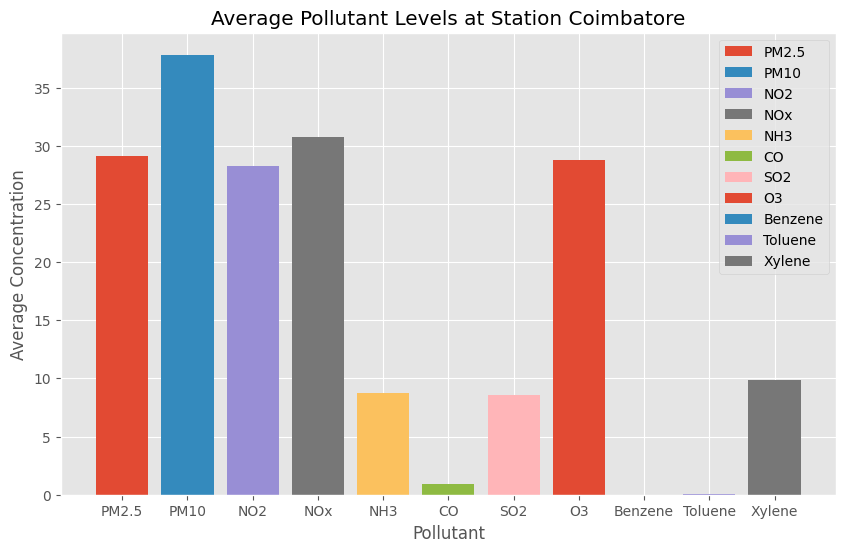

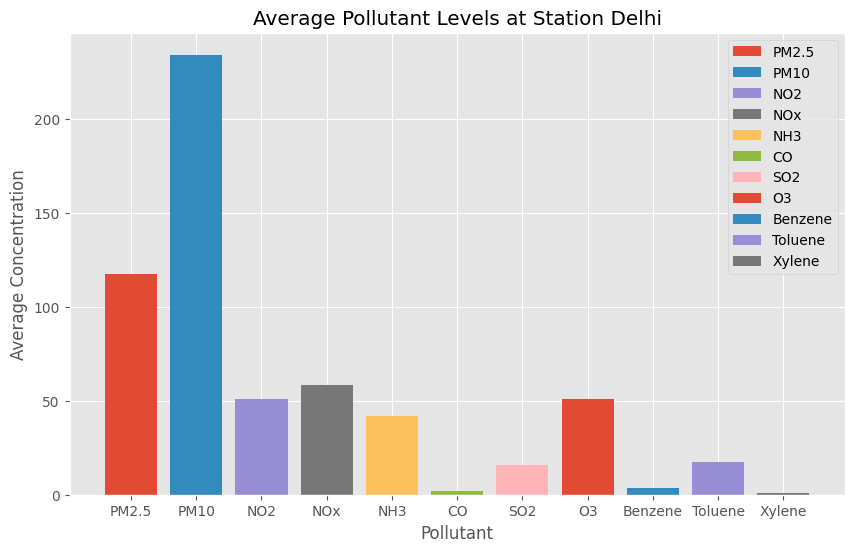

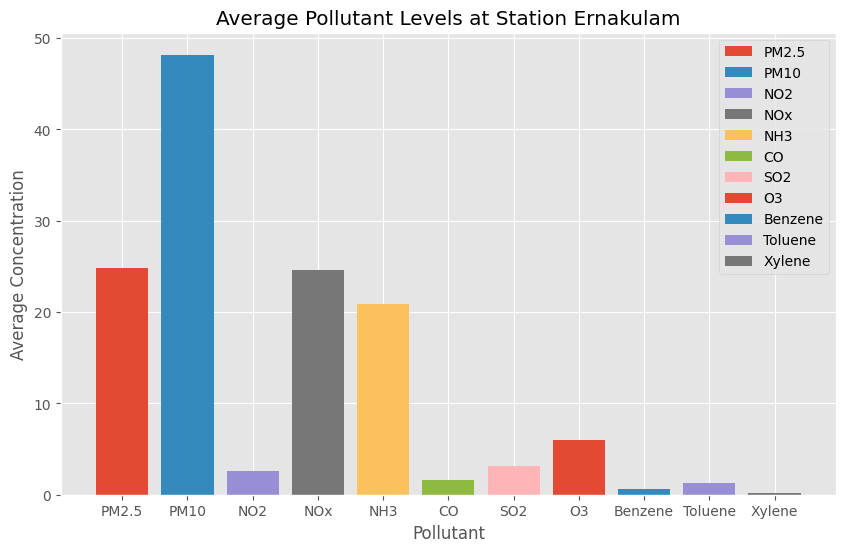

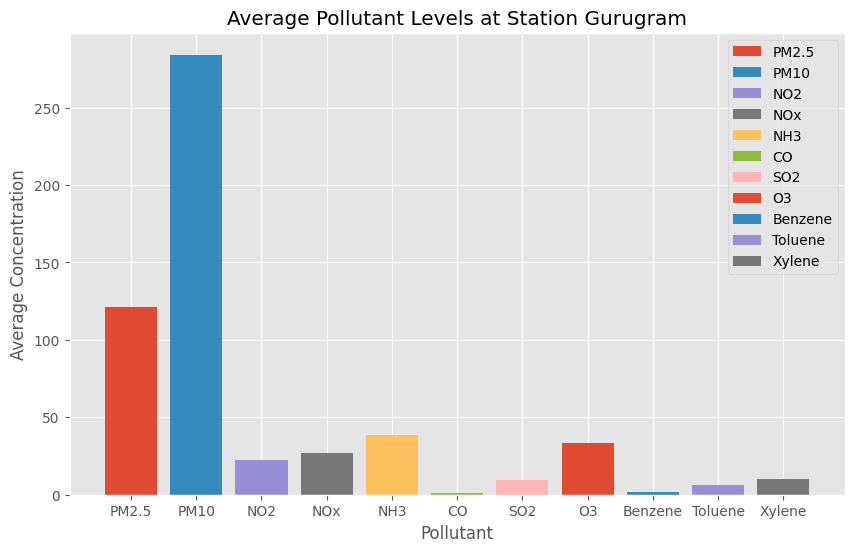

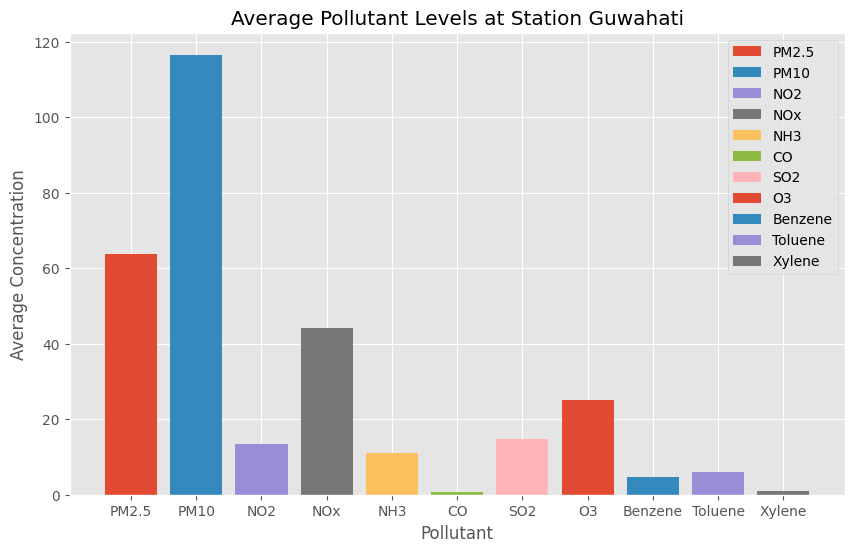

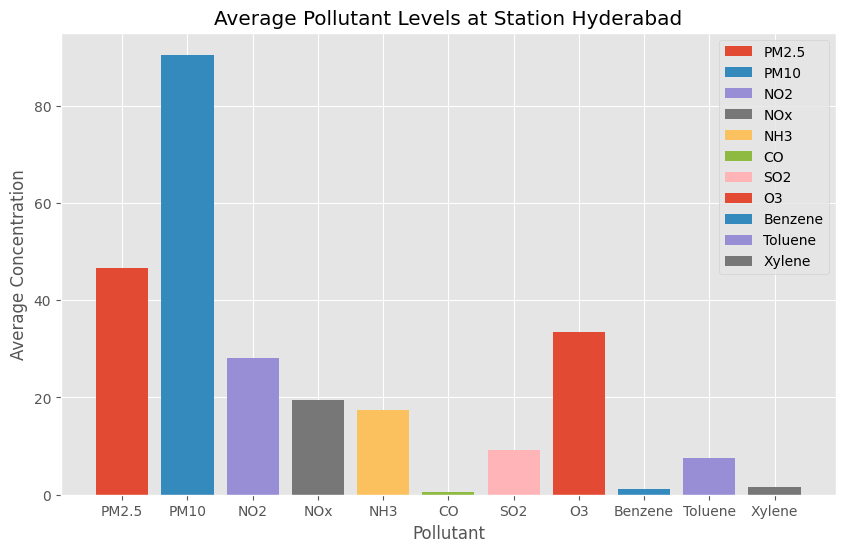

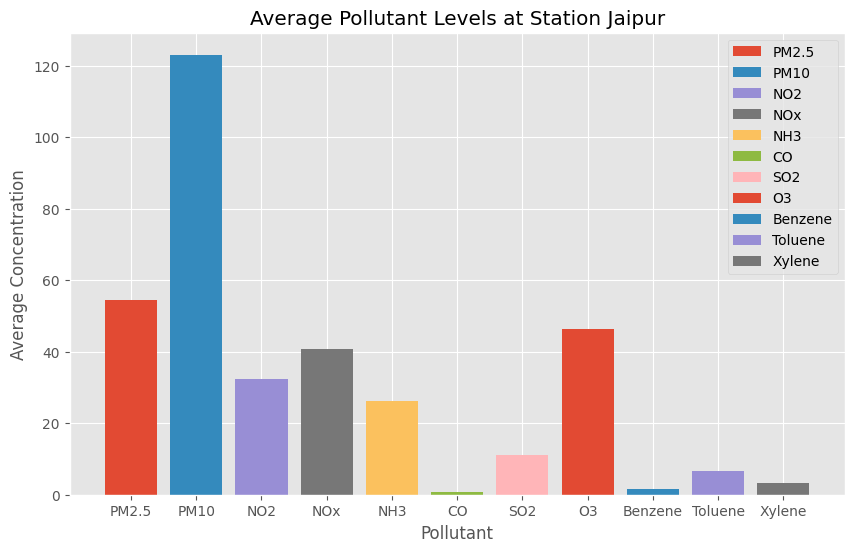

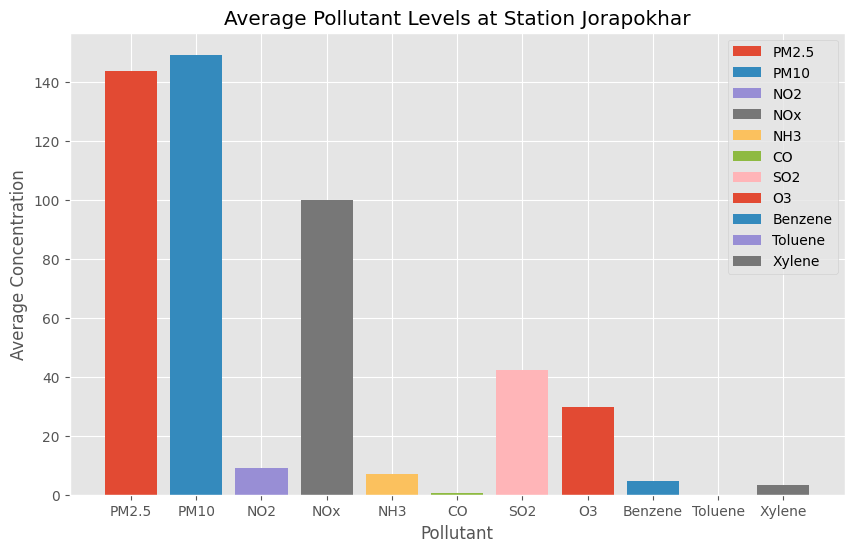

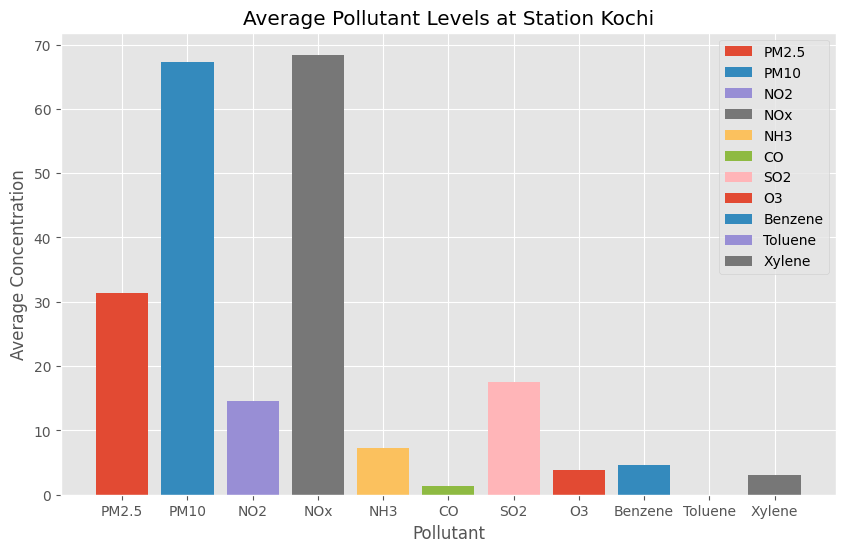

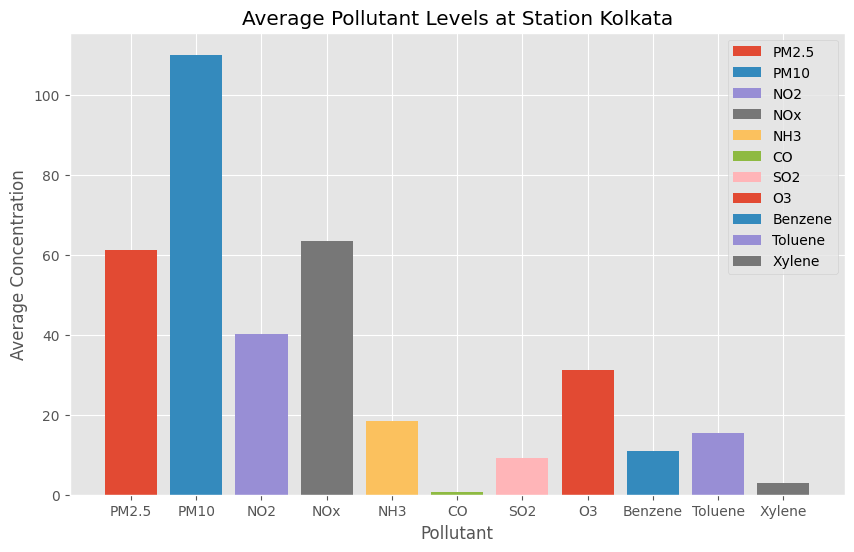

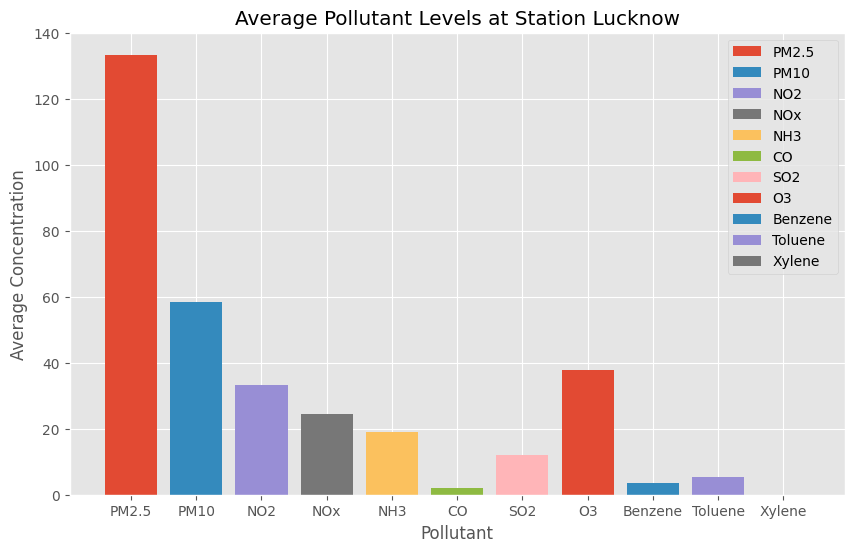

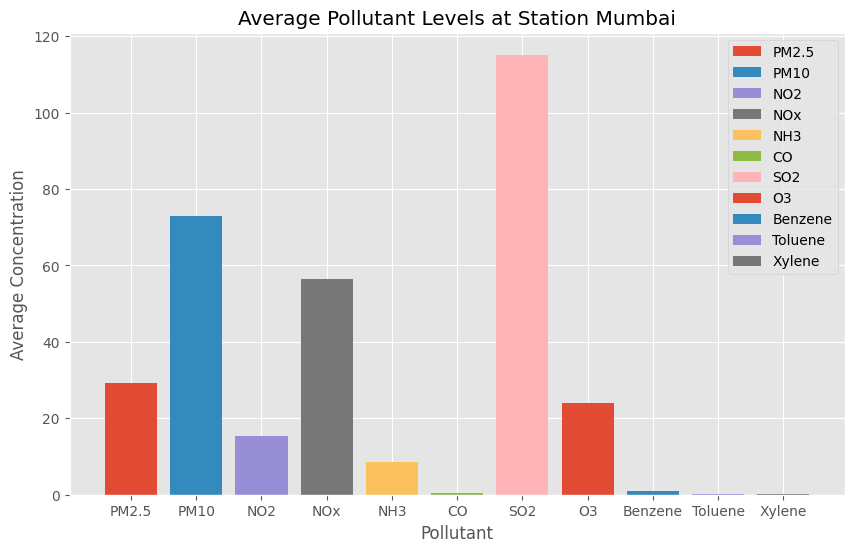

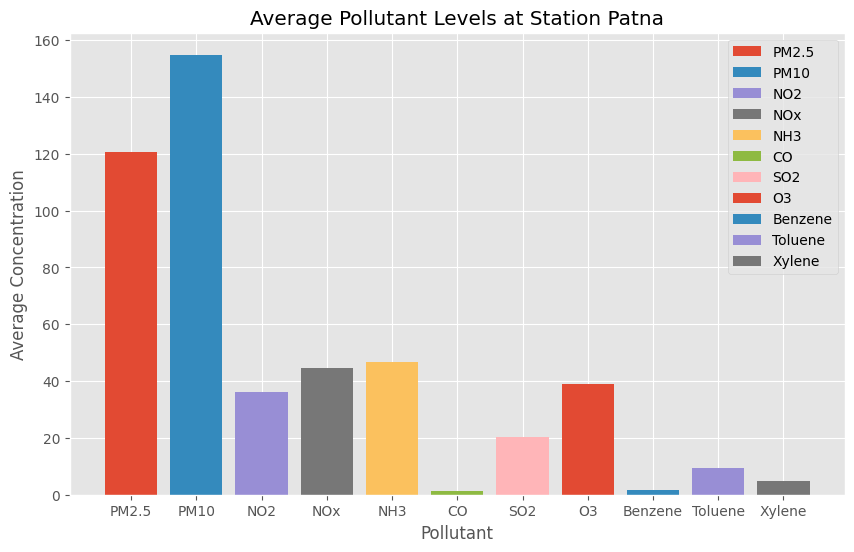

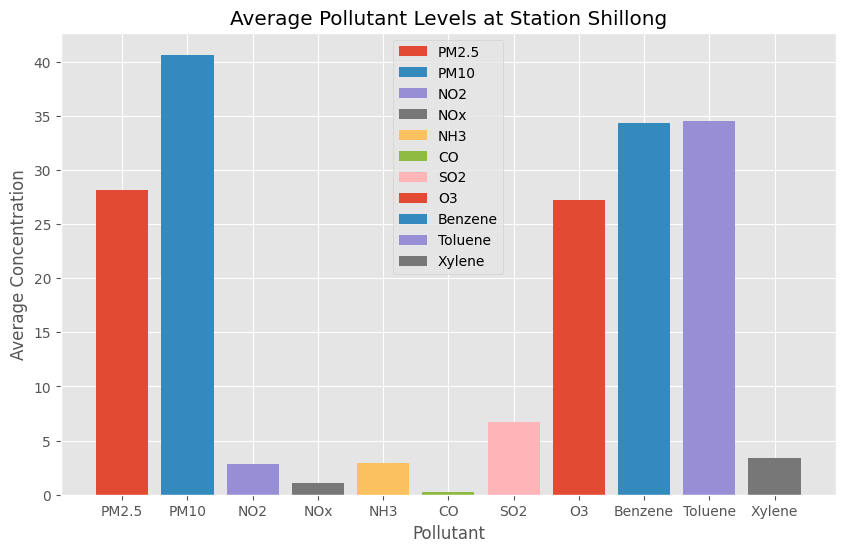

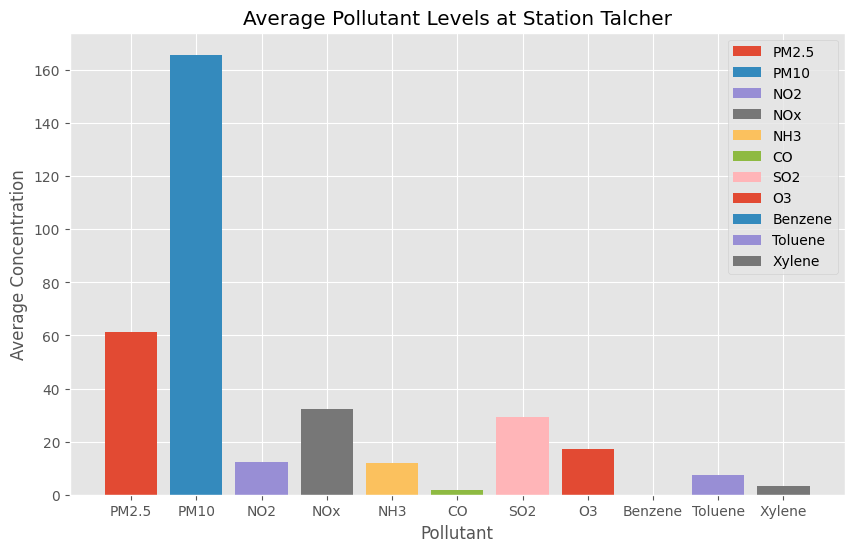

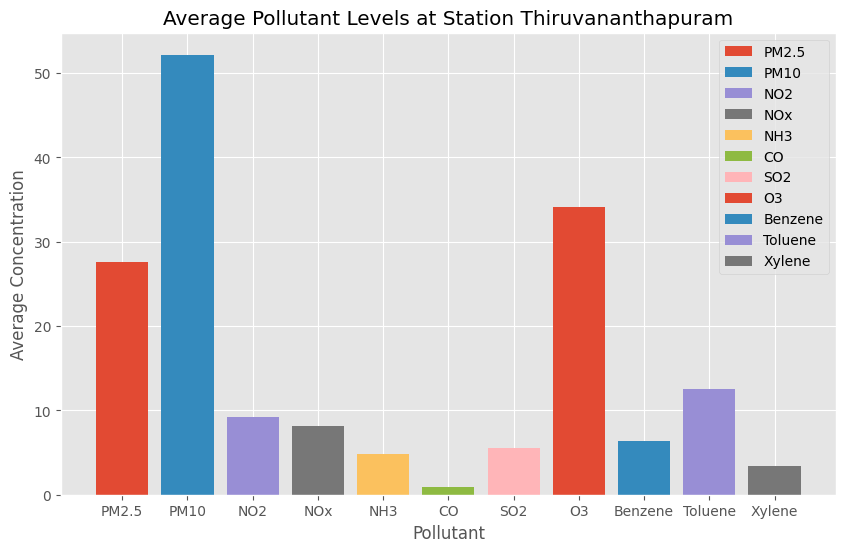

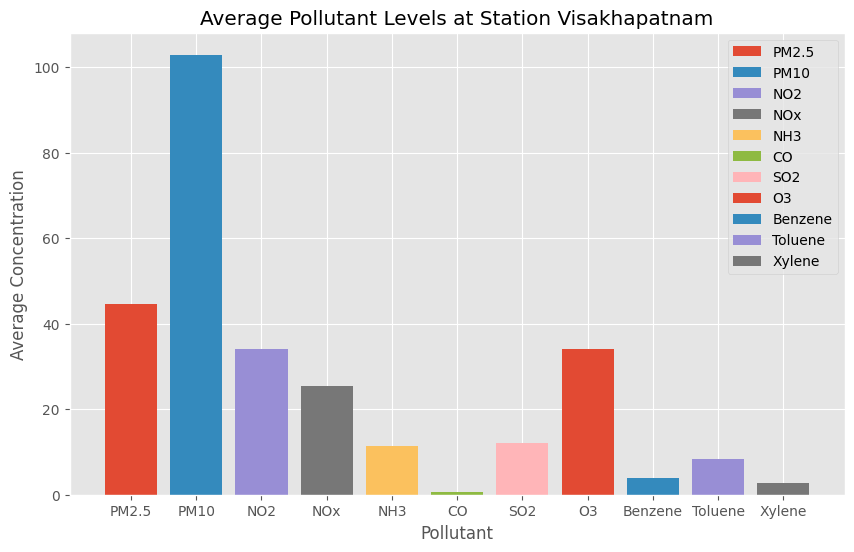

In [ ]:
pollutants = ['PM2.5','PM10','NO2','NOx','NH3','CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']
cities = pollution_df['City'].unique()

for city in cities:
    city_data = pollution_df[pollution_df['City'] == city]
    plt.figure(figsize=(10, 6))
    for pollutant in pollutants:
        plt.bar(pollutant, city_data[pollutant].mean(), label=pollutant)
    plt.title(f'Average Pollutant Levels at Station {city}')
    plt.xlabel('Pollutant')
    plt.ylabel('Average Concentration')
    plt.legend()
    plt.show()

In [ ]:
city_stats = pollution_df.groupby('City')[pollutants].mean().reset_index()

import plotly.express as px

# Melt the DataFrame to create a 'Pollutant' column
city_stats_melted = city_stats.melt(id_vars='City',
                               value_vars=pollutants,
                               var_name='Pollutant',
                               value_name='Average Concentration')

# Create the stacked bar chart
fig_cities= px.bar(city_stats_melted,
                     x='City',
                     y='Average Concentration',
                     color='Pollutant', # Use 'Pollutant' for color differentiation
                     title='Average Pollution Levels by City (Stacked)',
                     labels={'City': 'Cities', 'Average Concentration': 'Average Concentration'},
                     barmode='stack')

fig_cities.show()

In [34]:
pollutants = ['PM2.5','PM10','NO2','NOx','NH3','CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']
total_pollutant_concentration = pollution_df[pollutants].mean().sum()  # Calculates total concentration across all pollutants

# Calculate percentage for each pollutant
pollutant_percentages = [(pollution_df[pollutant].mean() / total_pollutant_concentration) * 100 for pollutant in pollutants]

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
perc_pol= px.pie(values= pollutant_percentages,names=pollutants, hole= 0.3,title= 'Percentage of Pollutants')
perc_pol.show()

<Figure size 800x800 with 0 Axes>

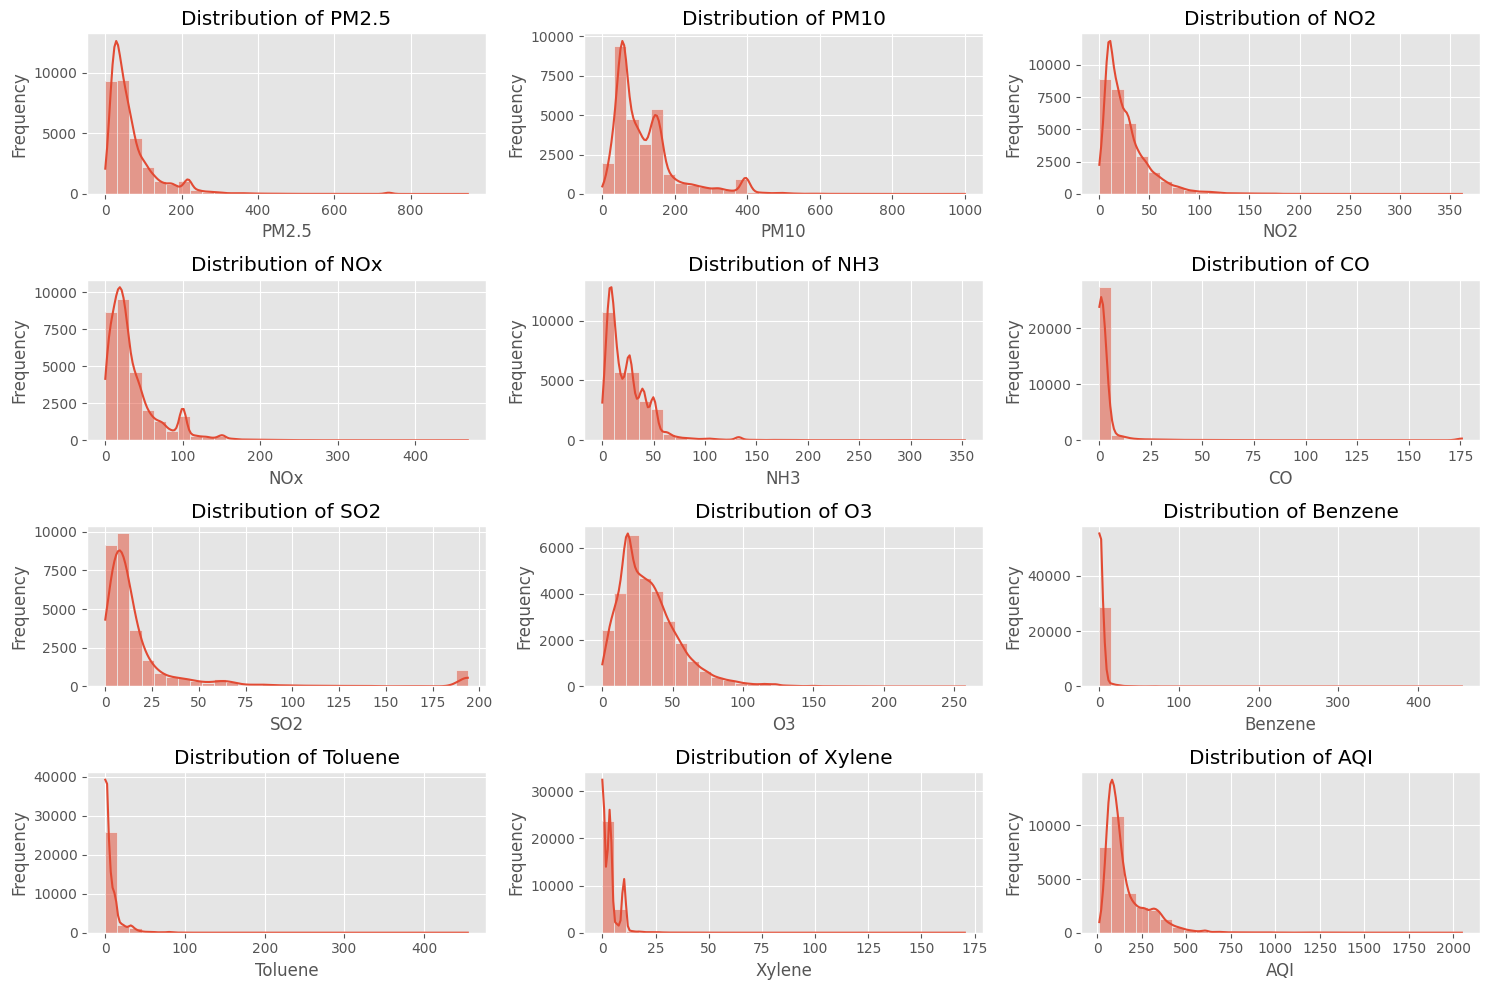

In [35]:
key_variables = ['PM2.5','PM10','NO2','NOx','NH3','CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

plt.figure(figsize=(15, 10))
for i, column in enumerate(key_variables, 1): # the subplot starts from index 1 and not from 0
  '''
  # enumerate() is a built-in Python function that lets you loop through a
  list and automatically keep track of the index (position) of each item at the same time.
  '''
  plt.subplot(4, 3, i)
  sns.histplot(pollution_df[column], kde=True, bins=30)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()